## Itroduction:

In this project, we will work with data from Car Advertisement. Our mission is to clean up the data and prepare a report that gives insight into the pricing based on many factors such as the mileage and the condition. The dataset is stored in a downloadable file. During our data preprocessing we will: Display the dataset following the standardized format, Verify and fix data types, Identify and fill in missing values, Identify and remove duplicate values, Create plots that communicate clear and concise understanding of the data.

In [1]:
# Importing all necessary Libraries:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
# Loading the data file:
vehicles_df = pd.read_csv('C:/Users/youss/OneDrive/Desktop/vehicles_us.csv')
vehicles_df.sample(n=10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
16888,1500,2002.0,chevrolet silverado,fair,8.0,gas,233900.0,automatic,truck,white,1.0,2018-08-06,53
22122,11500,2012.0,toyota prius,excellent,4.0,gas,88061.0,automatic,coupe,blue,NaN,2019-02-23,38
16152,3498,2003.0,honda civic lx,good,4.0,gas,NaN,automatic,sedan,black,NaN,2018-08-30,58
2365,4800,2005.0,honda accord,excellent,6.0,gas,149000.0,automatic,sedan,brown,NaN,2018-10-17,6
22299,19950,2011.0,chevrolet silverado 2500hd,excellent,8.0,diesel,179184.0,automatic,truck,black,1.0,2018-07-24,19
40878,20988,2019.0,dodge grand caravan,like new,6.0,gas,9500.0,automatic,mini-van,grey,NaN,2019-03-06,58
12064,4800,2001.0,ram 2500,good,6.0,diesel,393115.0,automatic,pickup,white,NaN,2018-05-19,18
21692,7400,2015.0,chrysler 200,excellent,4.0,gas,82000.0,automatic,sedan,grey,NaN,2018-10-12,62
17172,6500,2011.0,nissan rogue,excellent,4.0,gas,137000.0,automatic,SUV,black,1.0,2018-05-03,35
37914,16990,2015.0,buick enclave,good,NaN,gas,78272.0,automatic,SUV,grey,NaN,2018-09-26,63


## Fixing Data:

In [3]:
vehicles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [4]:
# Checking for duplicate values:
vehicles_df.duplicated().sum()

np.int64(0)

In [5]:
# Checking for missing values:
vehicles_df.isnull().sum()

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

In [6]:
# Filling the missing values with 0.0:
vehicles_df['is_4wd'] = vehicles_df['is_4wd'].fillna(0.0)

In [7]:
# Converting the column 'is_4wd' into str:
vehicles_df['is_4wd'] = vehicles_df['is_4wd'].astype(str) 

In [8]:
# Replacing values:
vehicles_df['is_4wd'] = vehicles_df['is_4wd'].replace({'1.0': 'Yes', '0.0': 'No'})
vehicles_df.sample(n=10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
34871,16995,2010.0,chevrolet silverado 2500hd,excellent,8.0,gas,122528.0,automatic,truck,NaN,Yes,2018-07-02,62
12490,8995,2012.0,chevrolet equinox,excellent,4.0,gas,102812.0,automatic,SUV,black,Yes,2019-03-29,34
49486,7700,1992.0,chevrolet corvette,excellent,8.0,gas,91900.0,manual,coupe,red,No,2018-05-31,41
41046,17550,2018.0,subaru forester,excellent,4.0,gas,3415.0,automatic,SUV,black,Yes,2018-05-23,19
46517,6995,NaN,chevrolet malibu,excellent,4.0,gas,94200.0,automatic,sedan,custom,No,2019-01-20,15
43876,4300,2002.0,ram 1500,good,8.0,gas,148132.0,automatic,pickup,silver,Yes,2018-10-20,35
51135,8900,2005.0,chevrolet silverado 1500,good,8.0,gas,205176.0,automatic,truck,white,Yes,2018-11-02,51
46173,10995,2008.0,ram 3500,good,6.0,diesel,NaN,automatic,pickup,silver,No,2019-03-24,83
15231,21995,2010.0,chevrolet camaro,like new,8.0,gas,3822.0,manual,coupe,black,No,2018-05-23,26
46783,16990,2016.0,nissan frontier,excellent,6.0,gas,47753.0,automatic,truck,black,Yes,2018-07-18,28


In [9]:
# Finding the mode of 'paint_color':
mode_color = vehicles_df['paint_color'].mode()
mode_color


0    white
Name: paint_color, dtype: object

In [10]:
# Filling the missing Values with the mode:
vehicles_df['paint_color'] = vehicles_df['paint_color'].fillna(vehicles_df['paint_color'].mode()[0])
vehicles_df.sample(n=10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
32747,4300,2005.0,toyota sienna,good,6.0,gas,NaN,automatic,mini-van,brown,No,2019-03-08,60
10723,5900,2009.0,subaru forester,excellent,4.0,gas,128000.0,manual,SUV,white,Yes,2019-01-03,75
17931,25999,2014.0,jeep wrangler,excellent,6.0,gas,NaN,manual,SUV,black,Yes,2018-11-02,51
5116,14833,2016.0,nissan altima,excellent,4.0,gas,42655.0,automatic,sedan,red,No,2018-07-26,59
14148,11950,2014.0,ford mustang,like new,6.0,gas,71558.0,manual,coupe,red,No,2018-08-29,48
24175,3850,2007.0,acura tl,good,6.0,gas,186000.0,automatic,sedan,white,No,2018-12-21,63
2185,2000,1996.0,ford f-150,fair,8.0,gas,153000.0,automatic,truck,red,Yes,2018-07-21,27
44539,30487,2015.0,toyota tundra,like new,8.0,gas,52500.0,automatic,truck,white,Yes,2018-07-27,10
23378,9950,NaN,ford f350 super duty,excellent,8.0,gas,94211.0,automatic,truck,white,No,2018-05-17,52
29768,4500,2010.0,volkswagen jetta,good,5.0,gas,130927.0,automatic,sedan,white,No,2018-05-10,25


In [11]:
# Finding the mode of 'model_year':
mode_model_year = vehicles_df['model_year'].mode()
mode_model_year

0    2013.0
Name: model_year, dtype: float64

In [12]:
# Filling the missing Values with the mode:
vehicles_df['model_year'] = vehicles_df['model_year'].fillna(vehicles_df['model_year'].mode()[0])

In [13]:
# Converting 'model_year' type into int:
vehicles_df['model_year'] = vehicles_df['model_year'].astype(int)

In [14]:
# Finding the mode of 'cylinders':
mode_cylinders = vehicles_df['cylinders'].mode()
mode_cylinders

0    8.0
Name: cylinders, dtype: float64

In [15]:
# Filling the missing Values with the mode:
vehicles_df['cylinders'] = vehicles_df['cylinders'].fillna(vehicles_df['cylinders'].mode()[0])

In [16]:
# Calculating the mean 'odometer':
odometer_mean = vehicles_df['odometer'].mean(skipna=True)
odometer_mean

np.float64(115553.4617376756)

In [17]:
# Filling the missing Values with the mean:
vehicles_df['odometer'] = vehicles_df['odometer'].fillna(odometer_mean)

In [18]:
# Converting 'odometer' type into int:
vehicles_df['odometer'] = vehicles_df['odometer'].astype(int)
vehicles_df.sample(n=10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
10297,8950,2018,chevrolet cruze,excellent,4.0,gas,13200,automatic,sedan,white,No,2018-11-23,76
23308,12995,2016,toyota camry,like new,4.0,gas,47500,automatic,sedan,silver,No,2018-11-15,30
47547,11500,2004,ford f-150,excellent,8.0,gas,147000,automatic,truck,red,Yes,2018-06-18,66
46927,18595,2018,nissan frontier,excellent,6.0,gas,30876,automatic,truck,silver,No,2018-05-19,5
33062,17995,2013,ram 1500,good,8.0,gas,139343,automatic,truck,white,Yes,2018-08-27,7
42680,3595,2006,honda accord,excellent,4.0,gas,198000,automatic,sedan,silver,No,2018-09-05,16
4716,4700,2006,jeep liberty,excellent,6.0,gas,108383,automatic,SUV,red,Yes,2018-10-09,34
39276,6000,2013,honda civic,good,4.0,gas,138000,automatic,coupe,red,No,2018-11-29,64
311,2700,2016,honda civic,excellent,4.0,gas,27000,automatic,sedan,white,No,2018-06-20,73
203,2000,2002,honda civic lx,good,4.0,gas,216875,automatic,coupe,red,No,2018-05-21,47


In [19]:
# Converting 'date_posted' type into datetime:
vehicles_df['date_posted'] = pd.to_datetime(vehicles_df['date_posted'])
vehicles_df.head()


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011,bmw x5,good,6.0,gas,145000,automatic,SUV,white,Yes,2018-06-23,19
1,25500,2013,ford f-150,good,6.0,gas,88705,automatic,pickup,white,Yes,2018-10-19,50
2,5500,2013,hyundai sonata,like new,4.0,gas,110000,automatic,sedan,red,No,2019-02-07,79
3,1500,2003,ford f-150,fair,8.0,gas,115553,automatic,pickup,white,No,2019-03-22,9
4,14900,2017,chrysler 200,excellent,4.0,gas,80903,automatic,sedan,black,No,2019-04-02,28


In [20]:
# Checking again for missing values:
vehicles_df.isnull().sum()

price           0
model_year      0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
transmission    0
type            0
paint_color     0
is_4wd          0
date_posted     0
days_listed     0
dtype: int64

In [21]:
vehicles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51525 non-null  int64         
 1   model_year    51525 non-null  int64         
 2   model         51525 non-null  object        
 3   condition     51525 non-null  object        
 4   cylinders     51525 non-null  float64       
 5   fuel          51525 non-null  object        
 6   odometer      51525 non-null  int64         
 7   transmission  51525 non-null  object        
 8   type          51525 non-null  object        
 9   paint_color   51525 non-null  object        
 10  is_4wd        51525 non-null  object        
 11  date_posted   51525 non-null  datetime64[ns]
 12  days_listed   51525 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(4), object(7)
memory usage: 5.1+ MB


## Price VS Odometer:

Analyzing how the price of a car decreases with increased mileage.

In [22]:
# how the price is effected:
price_model_odo = vehicles_df[['price', 'model_year', 'odometer']]
price_model_odo.head()

,price,model_year,odometer
0,9400,2011,145000
1,25500,2013,88705
2,5500,2013,110000
3,1500,2003,115553
4,14900,2017,80903


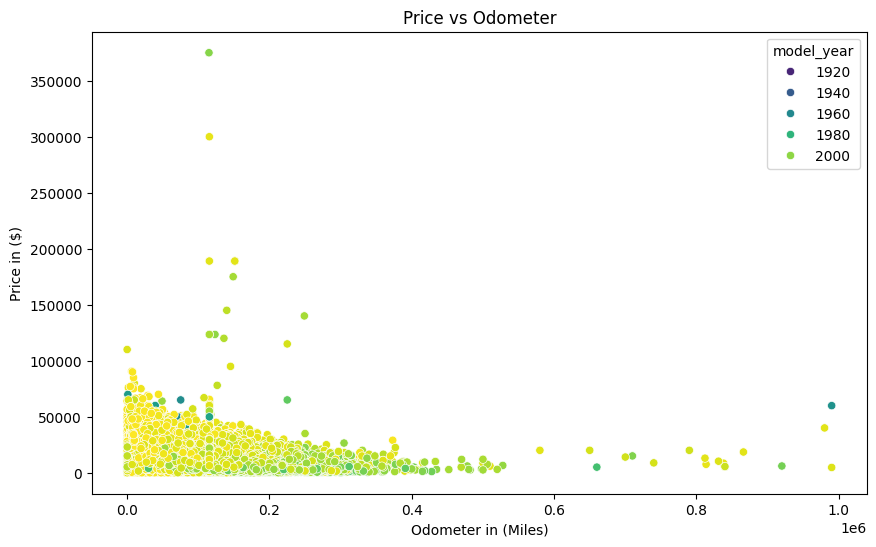

In [23]:
# Scatterplot showing how the price is affected by the mileage:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=price_model_odo, x='odometer', y='price', hue='model_year', palette='viridis')
plt.title('Price vs Odometer')
plt.xlabel('Odometer in (Miles)')
plt.ylabel('Price in ($)')
plt.show()

Looking at the Scatterplot above, Cars with lower odometer generally have higher prices, and cars with higher odometer tend to have lower prices.

## Price Distribution by Condition:

See how conditions affects the price.

In [24]:
price_condition = vehicles_df[['price', 'condition']]
price_condition.head()

,price,condition
0,9400,good
1,25500,good
2,5500,like new
3,1500,fair
4,14900,excellent


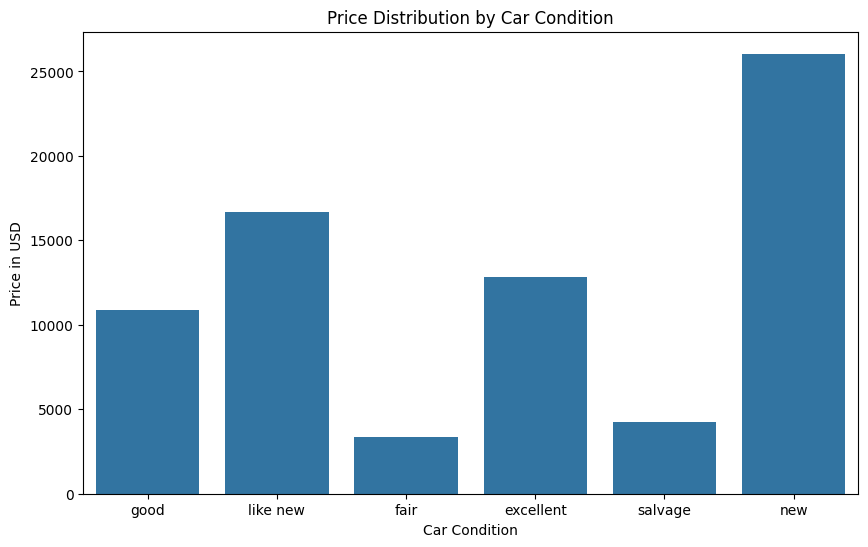

In [25]:
# Barplot showing how the price is affected by the condion:
plt.figure(figsize=(10, 6))
sns.barplot(data=price_condition, x='condition', y='price', errorbar=None)
plt.title('Price Distribution by Car Condition')
plt.xlabel('Car Condition')
plt.ylabel('Price in USD')
plt.show()

Based on the plot above, Cars in 'New' condition have the highest price, followed by 'Like New' and 'Excellent' condition vehicles, indicating a great value for money deals. Cars in 'Salvage' and 'Fair' condition have a significantly lower prices, reflecting lower demand.

## Days listed Vs. Condition Vs. Mileage:

Exploring how Mileage and Condition impact The Duration cars are listed.

In [26]:
sampled_data = vehicles_df.sample(n=1000)

In [27]:
days_on_the_market = sampled_data[['condition', 'odometer', 'days_listed']]
days_on_the_market.head()                               

,condition,odometer,days_listed
7866,excellent,88794,27
21302,good,275000,20
10933,good,81522,33
41779,like new,142401,19
49308,good,190000,124


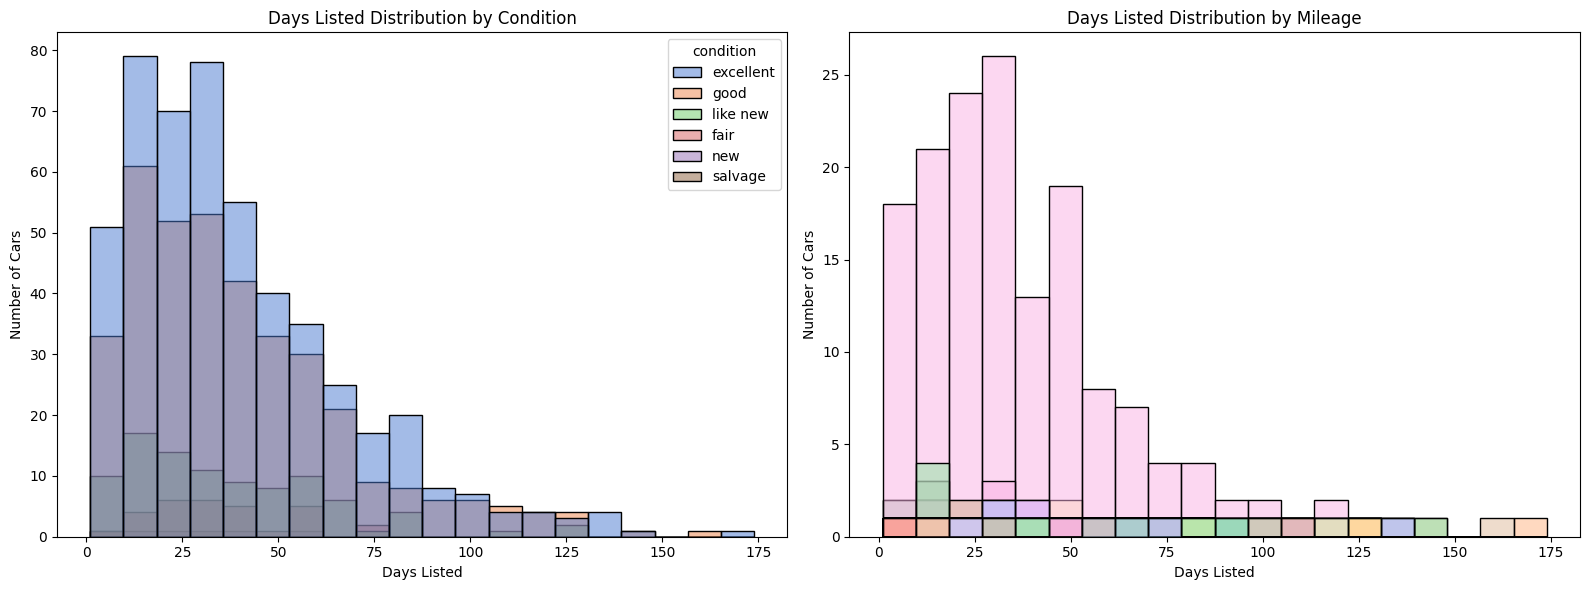

In [28]:
# Create a figure with 2 subplots:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# First subplot for Days Lister Vs. Condition:
sns.histplot(data=days_on_the_market, x='days_listed', hue='condition', bins=20, ax=ax1, palette='muted')
ax1.set_title('Days Listed Distribution by Condition')
ax1.set_xlabel('Days Listed')
ax1.set_ylabel('Number of Cars')

# Second subplot for Days Listed Vs. Odometer:
sns.histplot(data=days_on_the_market, x='days_listed', hue='odometer', bins=20, ax=ax2, palette='pastel', legend=False)
ax2.set_title('Days Listed Distribution by Mileage')
ax2.set_xlabel('Days Listed')
ax2.set_ylabel('Number of Cars')

# Adjust layout to prevent overlap:
plt.tight_layout()
plt.show()

From the Histograms ploted above, we can notice that:

- Cars with low mileage (<100k) and in better condition ('Good', 'Excellent', or 'Like New'), sell faster, typically whithin 25-50 days.

- Cars with high mileage (>150k) and in poor condition ('Fair' or 'Salvage') remain listed longer due to lower demand. 

## General Conclution:

The used car market is strongly influenced by condition, mileage and age. Cars in better condition ('Good', 'Excellent', or 'Like New') and with lower mileage (<100K) tend to sell faster, typically whithin 25-50 days and command higher prices due to strong demand.

In contrast, high mileage cars (>150K) and those in poor condition ('Fair' or 'Salvage') remain listed longer and are priced lower, reflecting reduced buyer interest.